# 1. Imports

In [1]:
import numpy as np
import pandas as pd
import os
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
import lightgbm
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.metrics import mean_squared_error as RMSE
from xgboost import plot_importance
import matplotlib.pyplot as plt
from nltk import word_tokenize
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# 2. Dataframe preparation

## 2.1 Prepare dataframe for shared articles table
Remove contents which are shared in English and Portuguese Language only.
Total distinct articles remaining = 3040

In [2]:
articles_df = pd.read_csv("./data/shared_articles.csv")
articles_df = articles_df[articles_df['eventType'] == 'CONTENT SHARED']
articles_df = articles_df.loc[articles_df['lang'].isin(['en','pt'])]
articles_df

,timestamp,eventType,contentId,authorPersonId,authorSessionId,authorUserAgent,authorRegion,authorCountry,contentType,url,title,text,lang
1,1459193988,CONTENT SHARED,-4110354420726924665,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
2,1459194146,CONTENT SHARED,-7292285110016212249,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://cointelegraph.com/news/bitcoin-future-w...,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,en
3,1459194474,CONTENT SHARED,-6151852268067518688,3891637997717104548,-1457532940883382585,NaN,NaN,NaN,HTML,https://cloudplatform.googleblog.com/2016/03/G...,Google Data Center 360° Tour,We're excited to share the Google Data Center ...,en
4,1459194497,CONTENT SHARED,2448026894306402386,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,https://bitcoinmagazine.com/articles/ibm-wants...,"IBM Wants to ""Evolve the Internet"" With Blockc...",The Aite Group projects the blockchain market ...,en
5,1459194522,CONTENT SHARED,-2826566343807132236,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.coindesk.com/ieee-blockchain-oxford...,IEEE to Talk Blockchain at Cloud Computing Oxf...,One of the largest and oldest organizations fo...,en
6,1459194557,CONTENT SHARED,-2148899391355011268,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.newsbtc.com/2016/03/28/banks-need-c...,Banks Need To Collaborate With Bitcoin and Fin...,It will take time until banks come around to t...,en
7,1459194599,CONTENT SHARED,4119190424078847945,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,https://bitcoinmagazine.com/articles/blockchai...,Blockchain Technology Could Put Bank Auditors ...,When most people think about computers and rob...,en
8,1459194751,CONTENT SHARED,-7926018713416777892,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,https://news.bitcoin.com/conglomerates-intervi...,Why Decentralized Conglomerates Will Scale Bet...,"Bitcoin.com spoke with the OpenLedger CEO, Ron...",en
9,1459194842,CONTENT SHARED,3353902017498793780,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,https://www.cryptocoinsnews.com/ethereum-rise-...,The Rise And Growth of Ethereum Gets Mainstrea...,"Ethereum, considered by many to be the most pr...",en
10,1459210504,CONTENT SHARED,-9157338616628196758,5206835909720479405,-7864441319395545950,NaN,NaN,NaN,HTML,http://economia.ig.com.br/2016-03-27/situacao-...,Situação financeira ruim de varejistas pressio...,A queda nas vendas e a deterioração na situaçã...,pt


## 2.2 Prepare interaction dataframe
Total User Interactions = 72312


In [3]:
interactions_df = pd.read_csv("./data/users_interactions.csv")
interactions_df

,timestamp,eventType,contentId,personId,sessionId,userAgent,userRegion,userCountry
0,1465413032,VIEW,-3499919498720038879,-8845298781299428018,1264196770339959068,NaN,NaN,NaN
1,1465412560,VIEW,8890720798209849691,-1032019229384696495,3621737643587579081,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,NY,US
2,1465416190,VIEW,310515487419366995,-1130272294246983140,2631864456530402479,NaN,NaN,NaN
3,1465413895,FOLLOW,310515487419366995,344280948527967603,-3167637573980064150,NaN,NaN,NaN
4,1465412290,VIEW,-7820640624231356730,-445337111692715325,5611481178424124714,NaN,NaN,NaN
5,1465413742,VIEW,310515487419366995,-8763398617720485024,1395789369402380392,Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...,MG,BR
6,1465415950,VIEW,-8864073373672512525,3609194402293569455,1143207167886864524,NaN,NaN,NaN
7,1465415066,VIEW,-1492913151930215984,4254153380739593270,8743229464706506141,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,SP,BR
8,1465413762,VIEW,310515487419366995,344280948527967603,-3167637573980064150,NaN,NaN,NaN
9,1465413771,VIEW,3064370296170038610,3609194402293569455,1143207167886864524,NaN,NaN,NaN


## 2.3 Individual virality computation in interaction table.
Here we add a new column for each interaction to the contentId and give an individual interaction virality index.

In [4]:
virality_metric  = {
    'VIEW' : 1,
    'LIKE' : 4,
    'COMMENT CREATED' : 10,
    'FOLLOW' : 25,
    'BOOKMARK' : 100
}
interactions_df['virality_index'] = interactions_df['eventType'].apply(lambda x: virality_metric[x])
interactions_df['virality_index'] 

0          1
1          1
2          1
3         25
4          1
5          1
6          1
7          1
8          1
9          1
10         1
11         1
12         1
13         1
14         1
15         1
16         1
17         1
18         1
19         1
20         1
21         1
22         1
23         1
24         1
25       100
26         1
27       100
28         1
29         1
        ... 
72282      1
72283      4
72284      1
72285      1
72286      1
72287      4
72288      1
72289      1
72290      1
72291      1
72292      1
72293      1
72294      1
72295    100
72296      1
72297      1
72298      1
72299      1
72300      1
72301      1
72302      1
72303      1
72304    100
72305      1
72306      1
72307      4
72308      1
72309      1
72310      1
72311      1
Name: virality_index, Length: 72312, dtype: int64

## 2.4 Compute Virality of each interacted article by grouping with ContentId

In [5]:
user_interaction_virality_df = interactions_df.groupby(['contentId'])['virality_index'].sum().reset_index()
user_interaction_virality_df

,contentId,virality_index
0,-9222795471790223670,227
1,-9216926795620865886,162
2,-9194572880052200111,272
3,-9192549002213406534,80
4,-9190737901804729417,12
5,-9189659052158407108,237
6,-9184137057748005562,1
7,-9176143510534135851,255
8,-9172673334835262304,1
9,-9171475473795142532,104


## 2.5 Merge articles and interaction_virality tables based on ContentId
We need all rows from user dataframe while need to join the virality index to each content Id

In [6]:
articles_df_virality = articles_df.merge(user_interaction_virality_df, how = 'left', left_on='contentId', right_on='contentId')
articles_df_virality['virality_index'] = articles_df_virality['virality_index'].fillna(0) # Assign 0 virality to uninteracted articles
articles_df_virality

,timestamp,eventType,contentId,authorPersonId,authorSessionId,authorUserAgent,authorRegion,authorCountry,contentType,url,title,text,lang,virality_index
0,1459193988,CONTENT SHARED,-4110354420726924665,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en,1.0
1,1459194146,CONTENT SHARED,-7292285110016212249,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://cointelegraph.com/news/bitcoin-future-w...,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,en,1.0
2,1459194474,CONTENT SHARED,-6151852268067518688,3891637997717104548,-1457532940883382585,NaN,NaN,NaN,HTML,https://cloudplatform.googleblog.com/2016/03/G...,Google Data Center 360° Tour,We're excited to share the Google Data Center ...,en,22.0
3,1459194497,CONTENT SHARED,2448026894306402386,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,https://bitcoinmagazine.com/articles/ibm-wants...,"IBM Wants to ""Evolve the Internet"" With Blockc...",The Aite Group projects the blockchain market ...,en,0.0
4,1459194522,CONTENT SHARED,-2826566343807132236,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.coindesk.com/ieee-blockchain-oxford...,IEEE to Talk Blockchain at Cloud Computing Oxf...,One of the largest and oldest organizations fo...,en,2.0
5,1459194557,CONTENT SHARED,-2148899391355011268,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.newsbtc.com/2016/03/28/banks-need-c...,Banks Need To Collaborate With Bitcoin and Fin...,It will take time until banks come around to t...,en,0.0
6,1459194599,CONTENT SHARED,4119190424078847945,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,https://bitcoinmagazine.com/articles/blockchai...,Blockchain Technology Could Put Bank Auditors ...,When most people think about computers and rob...,en,1.0
7,1459194751,CONTENT SHARED,-7926018713416777892,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,https://news.bitcoin.com/conglomerates-intervi...,Why Decentralized Conglomerates Will Scale Bet...,"Bitcoin.com spoke with the OpenLedger CEO, Ron...",en,2.0
8,1459194842,CONTENT SHARED,3353902017498793780,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,https://www.cryptocoinsnews.com/ethereum-rise-...,The Rise And Growth of Ethereum Gets Mainstrea...,"Ethereum, considered by many to be the most pr...",en,15.0
9,1459210504,CONTENT SHARED,-9157338616628196758,5206835909720479405,-7864441319395545950,NaN,NaN,NaN,HTML,http://economia.ig.com.br/2016-03-27/situacao-...,Situação financeira ruim de varejistas pressio...,A queda nas vendas e a deterioração na situaçã...,pt,5.0


## 2.6 Virality Stats

In [7]:
articles_df_virality['virality_index'].describe()

count    3040.000000
mean      125.420724
std       257.353811
min         0.000000
25%         7.000000
50%        40.000000
75%       147.250000
max      7907.000000
Name: virality_index, dtype: float64

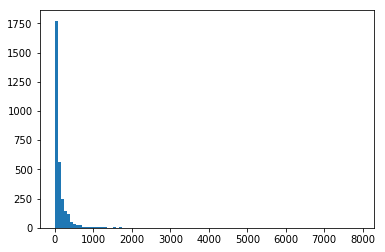

In [8]:
plt.hist(articles_df_virality['virality_index'], bins=100)
plt.show()

In [ ]:
articles_df_virality['virality_index'].quantile(0.4)

## 2.7 Prepare training Data by removing extreme outliers
As seen in above histogram, Some of the data i.e. above 95th percentile conributes to outliers in case of range/score prediction. Thus, ommitting those from train/test data.

In [10]:
articles_df_virality = articles_df_virality[articles_df_virality['virality_index'] < articles_df_virality['virality_index'].quantile(0.95)]

In [11]:
articles_df_virality_x = articles_df_virality[['title', 'text', 'lang']]
articles_df_virality_reg_y = articles_df_virality[['virality_index']]

# 3. Classification Approach

In this approach, we can modify the virality predictor problem as a multiclass classification problem. 

Simple of them is Binary Classification which has 2 class labels as: Viral(1), Not Viral(0)

# 3.1 Prepare 'viral' class label
Based on stastical analysis of virality series, we can see the range and quantiles. It can be seen that the virality is clustered between 10 to 500. The general computation can lead us to a threshold value for 'viral' binary label. I assume it to be 40th quantile of the 'virality_index'. 

In [12]:
articles_df_virality.loc[articles_df_virality['virality_index'] > articles_df_virality['virality_index'].quantile(0.4), 'viral'] = 1
articles_df_virality.loc[articles_df_virality['virality_index'] <= articles_df_virality['virality_index'].quantile(0.4), 'viral'] = 0
articles_df_virality

C:\Users\shrin\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\shrin\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,timestamp,eventType,contentId,authorPersonId,authorSessionId,authorUserAgent,authorRegion,authorCountry,contentType,url,title,text,lang,virality_index,viral
0,1459193988,CONTENT SHARED,-4110354420726924665,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en,1.0,0.0
1,1459194146,CONTENT SHARED,-7292285110016212249,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://cointelegraph.com/news/bitcoin-future-w...,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,en,1.0,0.0
2,1459194474,CONTENT SHARED,-6151852268067518688,3891637997717104548,-1457532940883382585,NaN,NaN,NaN,HTML,https://cloudplatform.googleblog.com/2016/03/G...,Google Data Center 360° Tour,We're excited to share the Google Data Center ...,en,22.0,1.0
3,1459194497,CONTENT SHARED,2448026894306402386,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,https://bitcoinmagazine.com/articles/ibm-wants...,"IBM Wants to ""Evolve the Internet"" With Blockc...",The Aite Group projects the blockchain market ...,en,0.0,0.0
4,1459194522,CONTENT SHARED,-2826566343807132236,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.coindesk.com/ieee-blockchain-oxford...,IEEE to Talk Blockchain at Cloud Computing Oxf...,One of the largest and oldest organizations fo...,en,2.0,0.0
5,1459194557,CONTENT SHARED,-2148899391355011268,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.newsbtc.com/2016/03/28/banks-need-c...,Banks Need To Collaborate With Bitcoin and Fin...,It will take time until banks come around to t...,en,0.0,0.0
6,1459194599,CONTENT SHARED,4119190424078847945,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,https://bitcoinmagazine.com/articles/blockchai...,Blockchain Technology Could Put Bank Auditors ...,When most people think about computers and rob...,en,1.0,0.0
7,1459194751,CONTENT SHARED,-7926018713416777892,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,https://news.bitcoin.com/conglomerates-intervi...,Why Decentralized Conglomerates Will Scale Bet...,"Bitcoin.com spoke with the OpenLedger CEO, Ron...",en,2.0,0.0
8,1459194842,CONTENT SHARED,3353902017498793780,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,https://www.cryptocoinsnews.com/ethereum-rise-...,The Rise And Growth of Ethereum Gets Mainstrea...,"Ethereum, considered by many to be the most pr...",en,15.0,0.0
9,1459210504,CONTENT SHARED,-9157338616628196758,5206835909720479405,-7864441319395545950,NaN,NaN,NaN,HTML,http://economia.ig.com.br/2016-03-27/situacao-...,Situação financeira ruim de varejistas pressio...,A queda nas vendas e a deterioração na situaçã...,pt,5.0,0.0


In [13]:
articles_df_virality_class_y = articles_df_virality[['viral']]

In [14]:
print('Total Portuguese posts = ', len(articles_df_virality[articles_df_virality['lang']=='pt']))
print('Total Viral Portuguese posts above virality threshold = ', len(articles_df_virality[(articles_df_virality['lang']=='pt') & (articles_df_virality['virality_index'] > articles_df_virality['virality_index'].quantile(0.4))]))
print('Total English posts = ', len(articles_df_virality[articles_df_virality['lang']=='en']))
print('Total Viral English posts above virality threshold = ', len(articles_df_virality[(articles_df_virality['lang']=='en') & (articles_df_virality['virality_index'] > articles_df_virality['virality_index'].quantile(0.4))]))

Total Portuguese posts =  776
Total Viral Portuguese posts above virality threshold =  508
Total English posts =  2112
Total Viral English posts above virality threshold =  1213


## 3.2 Evaluation for Classification

In [15]:
def evaluate_classification(y_test,y_pred):
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print("Accuracy of Classifier is : ", accuracy_score(y_test, y_pred))
    return 

## 3.3 TF-IDF Vectorizer

In [16]:
stopwards_list = stopwords.words('english') + stopwords.words('portuguese')

In [17]:
vectorizer = TfidfVectorizer(analyzer='word',
                             ngram_range=(1,3),
                             min_df=0.003,
                             max_df=0.5,
                             max_features=5000,
                             stop_words=stopwards_list)

In [18]:
tfidf_matrix = vectorizer.fit_transform(articles_df_virality_x['title'] + " " + articles_df_virality_x['text'])

In [19]:
tfidf_feature_names = vectorizer.get_feature_names()
X = tfidf_matrix.toarray()

## 3.4 Prepare Train, Test Data Split

In [20]:
X_train_class, X_test_class, y_train_class, y_test_class  = train_test_split(X, articles_df_virality_class_y, test_size=0.20, random_state=42)

## 3.5 Random Forest Classifier 

In [21]:
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train_class, y_train_class) 

C:\Users\shrin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(n_estimators=1000, random_state=0)

In [22]:
y_pred = classifier.predict(X_test_class)

### 3.5.1 Evaluation of Random Forest Classifier

In [26]:
print("Random Forest Performance: ")
print(confusion_matrix(y_test_class,y_pred))
print(classification_report(y_test_class,y_pred))
print("Accuracy of Classifier is : ", accuracy_score(y_test_class, y_pred))


Random Forest Performance: 
[[ 69 193]
 [ 43 273]]
              precision    recall  f1-score   support

         0.0       0.62      0.26      0.37       262
         1.0       0.59      0.86      0.70       316

    accuracy                           0.59       578
   macro avg       0.60      0.56      0.53       578
weighted avg       0.60      0.59      0.55       578

Accuracy of Classifier is :  0.5916955017301038


# 4. Regression Approach

## 4.1 Feature Definition for regression

In [27]:
stopword_set=set(stopwards_list)
def tokenizetext(text):
    return word_tokenize(text)
def words(text):
    l = [word for word in word_tokenize(text) if word.isalpha()]
    return l
def unique_words(text):
    return list(set(words(text)))
def rate_uni_words(text):
    uni_words = len(unique_words(text))/len(words(text))
    return uni_words
def avglengthtoken(text):
    w = words(text)
    sum = 0
    for item in w:
        sum+=len(item)
    avglen = sum/len(w)
    return avglen
def n_non_stop_unique_tokens(text):
    uw = unique_words(text)
    n_uw = [item for item in uw if item not in stopword_set]
    w = words(text)
    n_w = [item for item in w if item not in stopword_set]
    rate_nsut = len(n_uw)/len(n_w)
    return rate_nsut

## 4.2 Prepare Dataframe with extracted features 

In [28]:
data_rows = []
for idx, entry in articles_df_virality_x.iterrows():
    title = entry['title']
    text = entry['text']
    lang = entry['lang']
    row = {}
    row['n_token_titles'] = len(words(title))
    row['n_tokens_content'] = len(words(text))
    row['n_unique_tokens'] = len(unique_words(text))
    row['avg_token_len'] = avglengthtoken(text)
    row['n_stop_unique_tokens'] = n_non_stop_unique_tokens(text)
    data_rows.append(row)
    
final_df = pd.DataFrame(data_rows, columns=['n_token_titles','n_tokens_content','n_unique_tokens','avg_token_len','n_stop_unique_tokens'])

In [29]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg  = train_test_split(final_df, articles_df_virality_reg_y, test_size = 0.2, shuffle = True, random_state = 42)

## 4.3 XGBoost Regression models

In [30]:
xgb2 = XGBRegressor(random_state = 42)
paramsxgb = {'max_depth':[5,20,50,100]}
gsc = GridSearchCV(estimator = xgb2,param_grid = paramsxgb, cv = 3, scoring = 'neg_root_mean_squared_error')
gscres = gsc.fit(X_train_reg,y_train_reg)
gscres.best_params_

[01:01:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:01:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:01:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:01:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:01:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:01:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:01:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:01:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:01:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

{'max_depth': 5}

### 4.3.1 Comparison and evaluation using different boosts

In [32]:
xgb2.max_depth = gscres.best_params_['max_depth']
boost = ['gbtree','gblinear']
rmsescores = {}
for b in boost:
    xgb2.booster = b
    xgb2.fit(X_train_reg,y_train_reg)
    predicted = xgb2.predict(X_test_reg)
    rmsescores['xgb-'+b] = RMSE(y_test_reg, predicted, squared=True)
    print("RMSE error with {} booster is {} :".format(b,RMSE(y_test_reg,predicted,squared = True)))

[01:05:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE error with gbtree booster is 9557.619241831982 :
[01:05:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE error with gblinear booster is 9436.894832919013 :
